# The Multilayer Neural Network Model

## Part 1: Set up

First we must import necessary packages and the dataset for this model, Fashion MNIST, which is simliar to the original MNIST except that it provides images of a variety of clothing items, rather than digits.

In [1]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# Using keras module to import fashion data 
(train_X, train_y), (test_X, test_y) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The code below demonstrates the shape of each subset of the data. The training data, of which there are 60,000 entries, each 28 x 28 pixels, and the testing data, with 10,000 entries, each also 28 x 28 pixels.

In [41]:
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

# choose a random example to show the pixel values (commented out for brevity)
# print(f"train_X[0] = {train_X[7]}")

np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 



Additionally, the matrix above indicates the shade of each pixel in the image, on a scale of 0-255, with lower numbers representing darker shades and higher numbers representing lighter ones.

---
Below is an example of the Fashion MNIST images, specifically this image is categroized as a 'pullover'.

train_y[7] = 2 



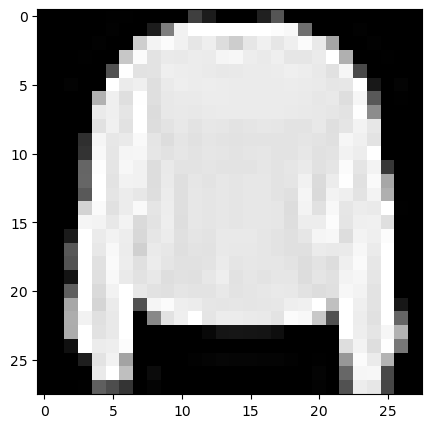

In [8]:
print(f"{train_y[7] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[7], cmap="gray")
plt.show()

### Quick Data Formatting

We will now scale our data so that each pixel value is one the interval [0,1], in order to prevent any values from becoming too large and causing errors. Further, we will flatten our pixel matrices and use ```temp_vec``` to one hot encode the category of each sample. This flattening allows us to pass the information from an image (that would otherwise be in matrix form) into the first layer of the network as a column vector. Thus, each of the 784 neurons will recieve a single piece of information representing the color of a single pixel. We do the same for both the training and testing data.

In [10]:
# Scaling data
train_X = train_X / 255
test_X = test_X / 255

# Flattens images to coloumn vectors 
flttrain_X = []
# One hot encode the training labels
ohtrain_y = []

for x, y in zip(train_X, train_y):
    flttrain_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    ohtrain_y.append(temp_vec)
   

# Repeat testing data 
flttest_X = []
ohtest_y = []

for x, y in zip(test_X, test_y):
    flttest_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    ohtest_y.append(temp_vec)
    

## Part 2: Creating the Model

Before we create a new class, we will first define some methods needed to carry out the more complex mathematical operations. The sigmoid function is our familiar activation function. The ```sigmoid_prime``` function (or derivative function) is required for backpropagation and the MSE function will serve as our cost function.

In [22]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))

def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost += mse(a, yi)
        m+=1
    return cost/m

Now we create a function to initialize the weights and bias. We also have the oppurtunity to modify the default number of neurons in each layer. While 784 is needed for the first layer (as long as our images are 28 x 28), and 10 are needed for the output (to determine which of the 10 categories an item belongs to), we can manipulate the remaining two layers to find an optimal arangement.

In [12]:
def initialize_weights(layers = [784, 60, 60, 10]):
  W = [[0.0]]
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

In [13]:
W, B = initialize_weights()

In [35]:
# initializes our input vector, and its true value
xi = flttrain_X[0]
yi = ohtrain_y[0]
a0 = xi

Next, we define the forward pass function, which takes in initial weights, bias, and an input vector. It iterates over each layer of the network and upon reaching the end, returns the activation values of the final layer.

In [36]:
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]]
    A = [xi]
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    _, A = forward_pass(W, B, xi)
    return np.argmax(A[-1])

# testing the function on a random data point
y_hat = forward_pass(W, B, flttrain_X[90], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

Prediction: np.argmax(y_hat) = 0
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 0.94521046491435


Here we define a random experiemnt function, showing us how the model performs before training. We can observe that the MSE is pretty high (approx. 1) and the prediction is often incorrect.

In [39]:
def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")

print(f"MSE(W, B, flttrain_X, ohtrain_y) = {MSE(W, B, flttrain_X, ohtrain_y)} \n")

random_experiment(W, B, flttrain_X, ohtrain_y)

MSE(W, B, flttrain_X, ohtrain_y) = 0.9989916141185424 

Actual label: 4
Predicted label: 0


This code defines a `Neural_Network` class that implements a feedforward neural network with backpropagation and stochastic gradient descent for training. Upon initialization, the network's architecture is defined through the `layers` list (defaulting to `[784, 60, 60, 10]`, corresponding to an input layer for 28×28 images, two hidden layers, and an output layer with 10 classes), and weights and biases are initialized using the `initialize_weights` function. The `train` method carries out the learning process over a given number of epochs by iterating through all training examples one by one. For each example, it performs a forward pass to compute the activations and preactivations at each layer, then applies backpropagation to compute the gradients (deltas) of the loss with respect to the weights and biases. The network parameters are then updated using gradient descent. The training progress is tracked using the mean squared error (MSE), which is printed at the beginning and end of each epoch and stored in the `errors_` attribute.

In [45]:
class Neural_Network(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, learning_rate = 0.046, epochs = 4):
        # Prints initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")
        sample_size = len(X_train)

        # Finds number layers, excluding first
        L = len(self.layers) - 1

        # For each epoch perform stochastic gradient descent. 
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = forward_pass(self.W, self.B, xi)

                deltas = dict()

                # Compute output error 
                output_error = (A[L] - yi)*sigmoid_prime(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*sigmoid_prime(Z[i])

                # Loops over intermediary layers and output layer to perform gradient descent
                for i in range(1, L+1):
                    self.W[i] -= learning_rate*deltas[i] @ A[i-1].T
                    self.B[i] -= learning_rate*deltas[i]

            # Shows cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")   

    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

## Part 3: Testing the Model

MSE(net.W, net.B, flttrain_X, ohtrain_y) = 1.172126964860269 

predicted digit is: 5
actual digit is: 9


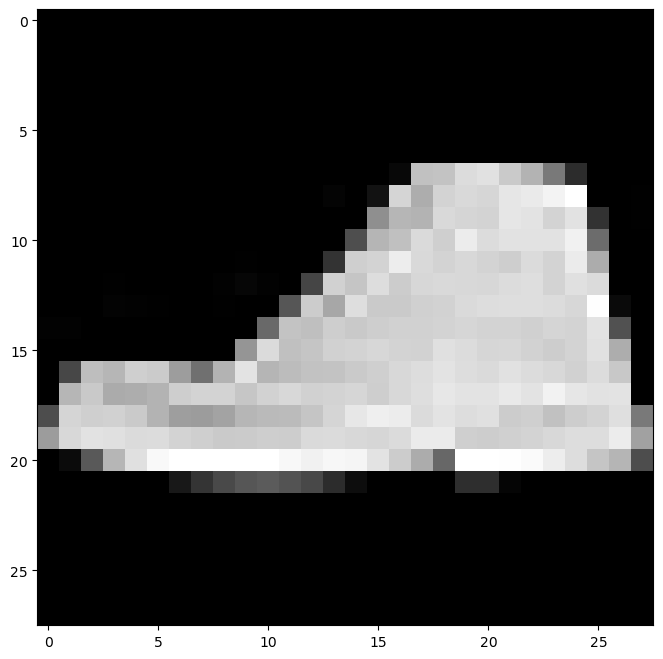

In [43]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = DenseNetwork(layers = [784, 60, 60, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flttrain_X, ohtrain_y) = {MSE(net.W, net.B, flttrain_X, ohtrain_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flttest_X))
prediction = net.predict(flttest_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(ohtest_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

As shown above, the model performs fairly poorly before training. So, we will train it and and examine how this affects our results.

In [44]:
net.train(flttrain_X, ohtrain_y)

Starting Cost = 1.172126964860269
1-Epoch Cost = 0.12087224818910264
2-Epoch Cost = 0.10655795984426115
3-Epoch Cost = 0.09846487211839249
4-Epoch Cost = 0.09391028630562377


Clearly, there is a steep decline in the error once training begins, and smaller reductions after the 2nd and 3rd epochs, as the model becomes more refined.

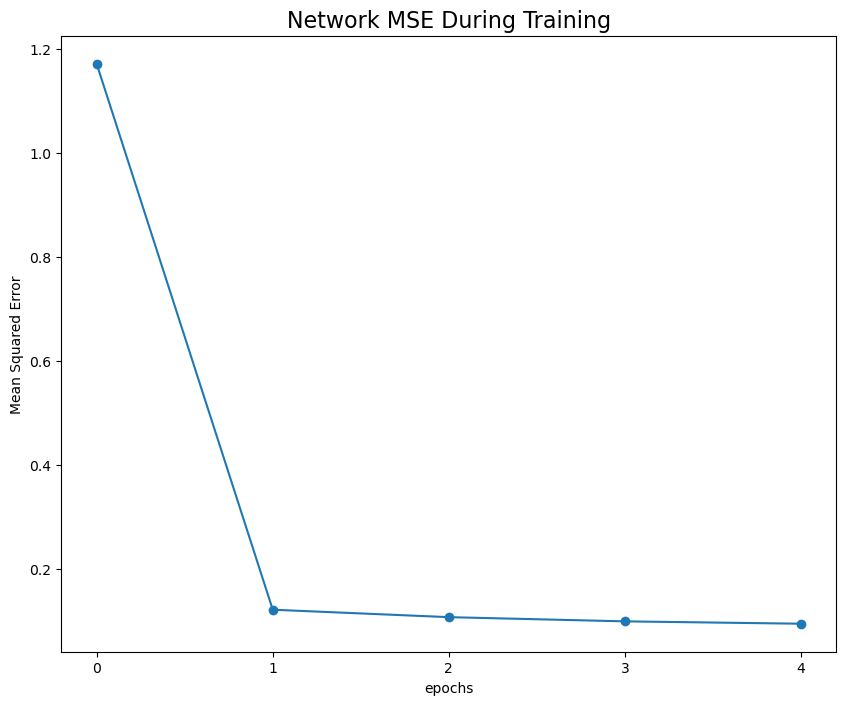

In [46]:
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
plt.plot(epochs, net.errors_, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()

In [48]:
sum([int(net.predict(x) == y) for x, y in zip(flttest_X, test_y)])/len(ohtest_y)

0.8547

### Conclusion

The model has a classification accuracy of 0.8547, or appoximately 85%. This shows that the predictions are certainly not random, but leaves room for improvement. One potential area for improvement is the activation function. Perhaps a RELU or tanh function would have more cleanly classified the data. However, this lower accuracy is not suprising as classifying these images is quite difficult due to their lack of detail, yet variety of possibilties (i.e., even with a better activation function, the model may always struggle to differentiate between a t-shirt (index of 0) and a shirt (index of 6)). Despite this, we can see the advantages of this model in its customizability and ability to take large amounts of data as inputs.